In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df['Survived'] = train_df['Survived'].astype('str')
train_df.Survived.dtype

dtype('O')

In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# features = ['Pclass','Sex','SibSp','Embarked','Parch']
# def convert(df,features):
#     for feature in features:
#         df[feature] = df[feature].astype('category')
# convert(train_df,features)
# convert(test_df,features)

In [6]:
train_df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_df['Survived'].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


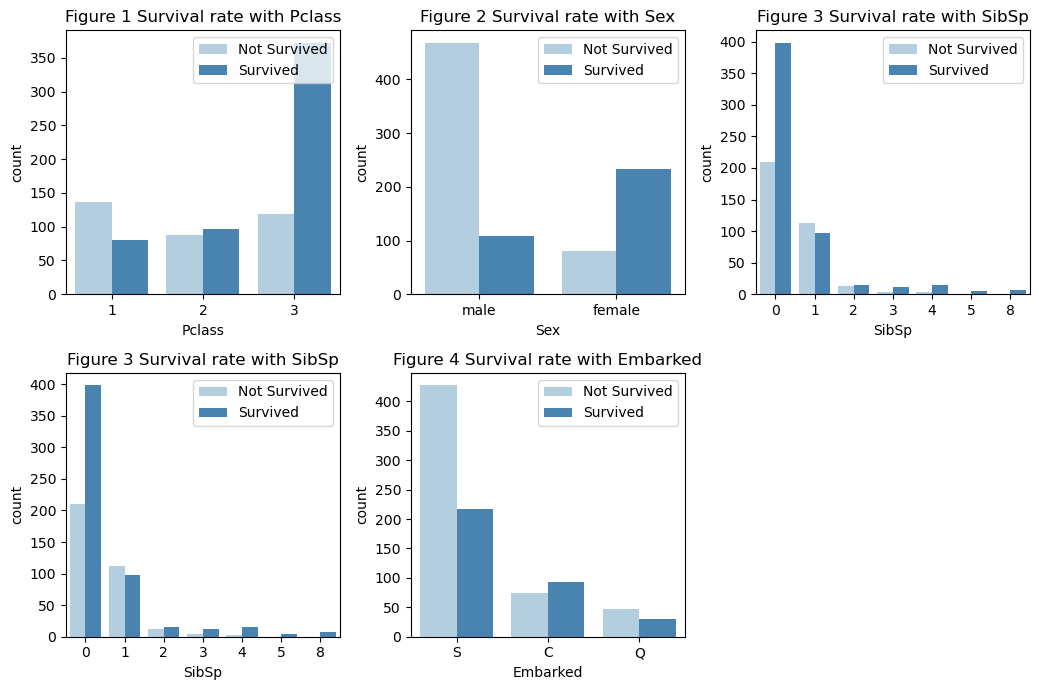

In [8]:
cols = ['Pclass','Sex','SibSp','Embarked','Parch']
nrows = 2 
ncols = 3
# Use subplots to draw a graph for each cols retrieve the number of survived in each col
fig,ax = plt.subplots(nrows,ncols, figsize= (ncols * 3.5, nrows * 3.5))
for r in range(nrows):
    for c in range(ncols):
        ax_i = ax[r,c]
        i = r * nrows + c 
        if i < len(cols):
            sns.countplot(data = train_df, x = cols[i], ax = ax_i, hue = 'Survived', palette ='Blues')
            ax_i.set_title(f'Figure {i+1} Survival rate with {cols[i]}')
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()

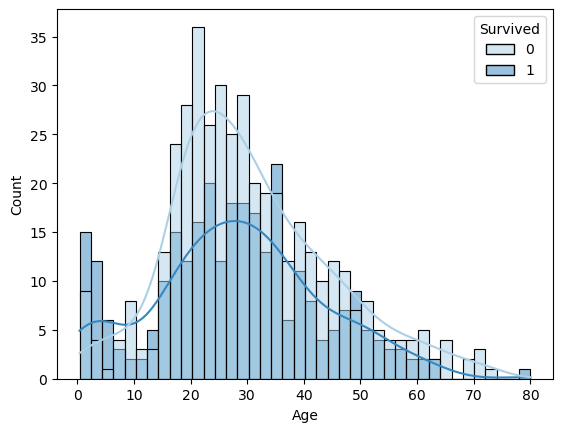

In [9]:
# Number of Survived or not follow the Age
sns.histplot(data= train_df,x = 'Age', bins = 40 , hue = 'Survived',palette = 'Blues', kde = True);

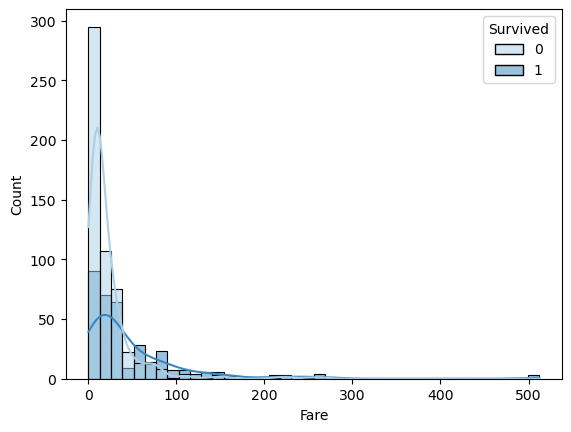

In [10]:
# Number of Survived or not follow the Fare
sns.histplot(data= train_df,x = 'Fare', bins = 40 , hue = 'Survived',palette = 'Blues', kde = True);

0       Economic
1         Luxury
2       Standard
3         Luxury
4       Standard
         ...    
886     Standard
887    Expensive
888    Expensive
889    Expensive
890     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

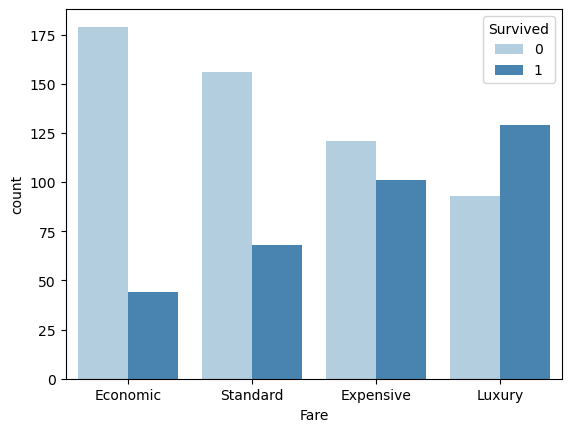

In [11]:
fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories) # label for each element in categories
sns.countplot(data = train_df, palette = 'Blues', hue = 'Survived', x=quartile_data);
quartile_data

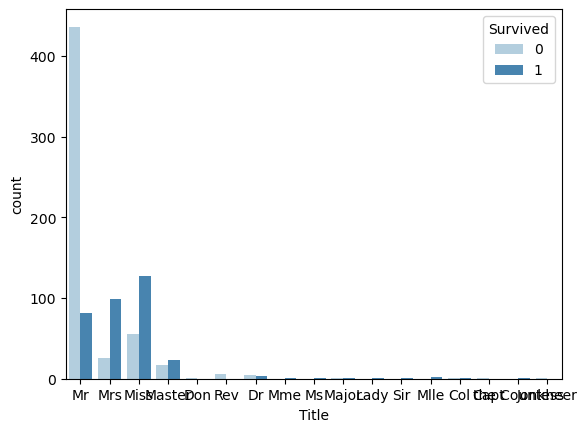

In [12]:
import re  # regular expression modul
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda x : extract_title(x))
train_df['Title'].value_counts()
test_df['Title'] = test_df['Name'].apply(lambda x : extract_title(x))
sns.countplot(data = train_df, x ='Title', hue = 'Survived', palette = 'Blues');


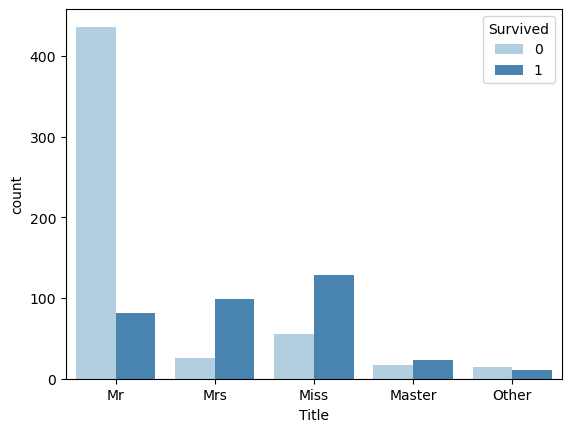

In [13]:
def group_title(title):
    if title in ['Mr',"Mrs",'Miss',"Master"]:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Other'
train_df['Title'] = train_df['Title'].apply(lambda x : group_title(x))
test_df['Title'] = test_df['Title'].apply(lambda x : group_title(x))
sns.countplot(data = train_df, x=train_df['Title'], hue = 'Survived', palette = 'Blues');

### Family 
SibSp(anh chi em), Parch (bo me )

In [15]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') +train_df['Parch'].astype('int')
test_df['Family_Size'] = test_df['SibSp'].astype('int') +test_df['Parch'].astype('int')

In [16]:
train_df['Family_cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels =['Solo','Small','Medium','Large']) # (0,1],(1,4]

In [17]:
test_df['Family_cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels =['Solo','Small','Medium','Large'])

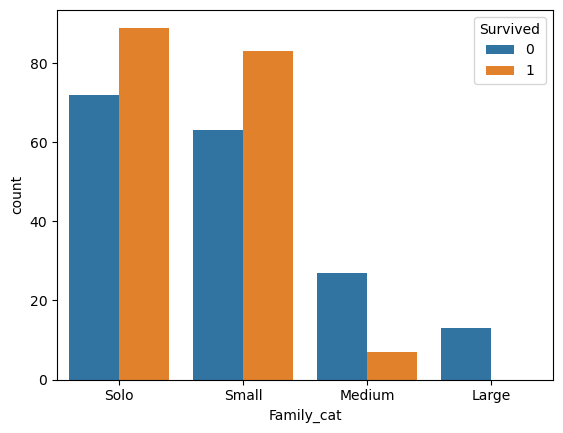

In [18]:
sns.countplot(data = train_df, x = 'Family_cat', hue = 'Survived');

### Data Wrangling

In [20]:
num_feature = ['Age','Fare']
cat_feature = ['Sex','Pclass', 'Embarked', 'Title', 'Family_cat']
features_cols = num_feature + cat_feature
def display_missing(df,features):
    nrows = df.shape[0]
    for feature in features:
        missing_val = df[feature].isnull().sum()
        if missing_val > 0:
            print(f'Column {feature} has {missing_val *100/ nrows : .2f}% missing value')
display_missing(train_df,features_cols)
display_missing(test_df,features_cols)

Column Age has  19.87% missing value
Column Embarked has  0.22% missing value
Column Family_cat has  60.27% missing value
Column Age has  20.57% missing value
Column Fare has  0.24% missing value
Column Family_cat has  60.53% missing value


### Filling missing values

In [22]:
train_df.dtypes 

PassengerId       int64
Survived         object
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Title            object
Family_Size       int32
Family_cat     category
dtype: object

In [23]:
from sklearn.impute import SimpleImputer 
si = SimpleImputer()
train_df[num_feature] = si.fit_transform(train_df[num_feature])
test_df[num_feature] = si.fit_transform(test_df[num_feature])
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Solo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Solo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Solo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,NaN


In [24]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,Solo
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,Small


In [25]:
display_missing(train_df,features_cols)
display_missing(test_df,features_cols)

Column Embarked has  0.22% missing value
Column Family_cat has  60.27% missing value
Column Family_cat has  60.53% missing value


In [26]:
for col in  train_df.columns:
    missing = train_df[col].isna().sum()
    print(f'{col} has {missing} data ')

PassengerId has 0 data 
Survived has 0 data 
Pclass has 0 data 
Name has 0 data 
Sex has 0 data 
Age has 0 data 
SibSp has 0 data 
Parch has 0 data 
Ticket has 0 data 
Fare has 0 data 
Cabin has 687 data 
Embarked has 2 data 
Title has 0 data 
Family_Size has 0 data 
Family_cat has 537 data 


In [27]:
for col in  test_df.columns:
    missing = test_df[col].isna().sum()
    print(f'{col} has {missing} data ')

PassengerId has 0 data 
Pclass has 0 data 
Name has 0 data 
Sex has 0 data 
Age has 0 data 
SibSp has 0 data 
Parch has 0 data 
Ticket has 0 data 
Fare has 0 data 
Cabin has 327 data 
Embarked has 0 data 
Title has 0 data 
Family_Size has 0 data 
Family_cat has 253 data 


In [28]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Solo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Solo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Solo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,NaN


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Family_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,Solo
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,Small


### Model Seletion

In [31]:
y = train_df.Survived
x = train_df.drop(['Survived', 'Name','Cabin','Family_cat','PassengerId','Ticket'], axis = 1)
test_df = test_df.drop(['PassengerId', 'Name','Cabin','Family_cat','Ticket'], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,3,male,22.000000,1,0,7.2500,S,Mr,1
1,1,female,38.000000,1,0,71.2833,C,Mrs,1
2,3,female,26.000000,0,0,7.9250,S,Miss,0
3,1,female,35.000000,1,0,53.1000,S,Mrs,1
4,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Other,0
887,1,female,19.000000,0,0,30.0000,S,Miss,0
888,3,female,29.699118,1,2,23.4500,S,Miss,3
889,1,male,26.000000,0,0,30.0000,C,Mr,0


In [32]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,3,male,34.5,0,0,7.8292,Q,Mr,0
1,3,female,47.0,1,0,7.0000,S,Mrs,1
2,2,male,62.0,0,0,9.6875,Q,Mr,0
3,3,male,27.0,0,0,8.6625,S,Mr,0
4,3,female,22.0,1,1,12.2875,S,Mrs,2


In [33]:
x.dtypes

Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
Family_Size      int32
dtype: object

In [34]:
s = (x.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Sex', 'Embarked', 'Title']

In [35]:
object_cols = object_cols[1:]

In [54]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
le = LabelEncoder()
y = le.fit_transform(y)
x['Sex'] = le.fit_transform(x['Sex'])
oh = OneHotEncoder(handle_unknown= 'ignore')
od = OrdinalEncoder()
x[object_cols] = od.fit_transform(x[object_cols])
#c = pd.DataFrame(oh.fit_transform(x[object_cols]))
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,3,1,22.000000,1,0,7.2500,2.0,2.0,1
1,1,0,38.000000,1,0,71.2833,0.0,3.0,1
2,3,0,26.000000,0,0,7.9250,2.0,1.0,0
3,1,0,35.000000,1,0,53.1000,2.0,3.0,1
4,3,1,35.000000,0,0,8.0500,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2.0,4.0,0
887,1,0,19.000000,0,0,30.0000,2.0,1.0,0
888,3,0,29.699118,1,2,23.4500,2.0,1.0,3
889,1,1,26.000000,0,0,30.0000,0.0,2.0,0


In [66]:
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df[object_cols] = od.fit_transform(test_df[object_cols])
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,3,1,34.50000,0,0,7.8292,1.0,2.0,0
1,3,0,47.00000,1,0,7.0000,2.0,3.0,1
2,2,1,62.00000,0,0,9.6875,1.0,2.0,0
3,3,1,27.00000,0,0,8.6625,2.0,2.0,0
4,3,0,22.00000,1,1,12.2875,2.0,3.0,2
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2.0,2.0,0
414,1,0,39.00000,0,0,108.9000,0.0,4.0,0
415,3,1,38.50000,0,0,7.2500,2.0,2.0,0
416,3,1,30.27259,0,0,8.0500,2.0,2.0,0


In [68]:
from sklearn.model_selection import train_test_split 
X_train ,X_valid, y_train,y_valid = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 0)
#X_train = X_train.iloc[:,:-1]
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
140,3,0,29.699118,0,2,15.2458,0.0,3.0,2
439,2,1,31.000000,0,0,10.5000,2.0,2.0,0
817,2,1,31.000000,1,1,37.0042,0.0,2.0,2
378,3,1,20.000000,0,0,4.0125,0.0,2.0,0
491,3,1,21.000000,0,0,7.2500,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,0.0,1.0,2
192,3,0,19.000000,1,0,7.8542,2.0,1.0,1
629,3,1,29.699118,0,0,7.7333,1.0,2.0,0
559,3,0,36.000000,1,0,17.4000,2.0,3.0,1


In [78]:
y_valid

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [60]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size
0,3,male,34.5,0,0,7.8292,1.0,2.0,0
1,3,female,47.0,1,0,7.0000,2.0,3.0,1
2,2,male,62.0,0,0,9.6875,1.0,2.0,0
3,3,male,27.0,0,0,8.6625,2.0,2.0,0
4,3,female,22.0,1,1,12.2875,2.0,3.0,2


In [94]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 100 , random_state = 0)
rf.fit(X_train,y_train)
predict = rf.predict(test_df)

In [86]:
X_valid.shape, y_valid.shape

((179, 9), (179,))

In [88]:
test_df.shape

(418, 9)

In [92]:
test_df = test_df.iloc[:179,:]
test_df.shape

(179, 9)

In [100]:
from sklearn.metrics import mean_absolute_error 
# with new data 
print(mean_absolute_error(y_valid, predict)) # 2 parameter to estimate mae must have the same instance and columns

0.44042721097046594


In [102]:
# with validation from original data 
preds = rf.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

0.2264169732483896
